In [1]:
# prompt: i want to load dataset from huggingface https://huggingface.co/datasets/AdamCodd/emotion-balanced

!pip install datasets

from datasets import load_dataset

dataset = load_dataset("AdamCodd/emotion-balanced")

dataset


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 7.8 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.06k [00:00<?, ?B/s]

train.jsonl:   0%|          | 0.00/1.97M [00:00<?, ?B/s]

validation.jsonl:   0%|          | 0.00/248k [00:00<?, ?B/s]

test.jsonl:   0%|          | 0.00/244k [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [2]:
!pip install datasets transformers torch pandas numpy scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [3]:
import numpy as np
import pandas as pd
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import AutoTokenizer
import torch
from torch.utils.data import Dataset, DataLoader

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [4]:
# Convert to pandas DataFrames for EDA
train_df = pd.DataFrame(dataset['train'])
valid_df = pd.DataFrame(dataset['validation'])
test_df = pd.DataFrame(dataset['test'])

In [5]:
# Define label mapping
label_map = {
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise'
}

In [6]:
# Add text label column for verification
for df in [train_df, valid_df, test_df]:
    df['emotion'] = df['label'].map(label_map)

In [7]:
# Check class distribution
print("Train Class Distribution:")
print(train_df['emotion'].value_counts())
print("\nValidation Class Distribution:")
print(valid_df['emotion'].value_counts())
print("\nTest Class Distribution:")
print(test_df['emotion'].value_counts())

Train Class Distribution:
emotion
anger       2667
love        2667
fear        2667
sadness     2667
joy         2666
surprise    2666
Name: count, dtype: int64

Validation Class Distribution:
emotion
surprise    334
anger       334
joy         333
fear        333
sadness     333
love        333
Name: count, dtype: int64

Test Class Distribution:
emotion
joy         334
fear        334
anger       333
surprise    333
love        333
sadness     333
Name: count, dtype: int64


In [8]:
# Preprocessing for Traditional ML Models (TF-IDF)
def prepare_tfidf_features(train_texts, test_texts):
    vectorizer = TfidfVectorizer(max_features=5000)
    X_train = vectorizer.fit_transform(train_texts)
    X_test = vectorizer.transform(test_texts)
    return X_train, X_test, vectorizer

In [9]:
# Prepare TF-IDF features
X_train_tfidf, X_test_tfidf, tfidf_vectorizer = prepare_tfidf_features(
    train_df['text'], test_df['text']
)

In [10]:
# Save TF-IDF features for later use
np.savez('tfidf_features.npz',
         X_train=X_train_tfidf,
         X_test=X_test_tfidf,
         y_train=train_df['label'],
         y_test=test_df['label'])

In [11]:
# Preprocessing for Deep Learning Models (BERT)
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [12]:
def tokenize_function(examples):
    return tokenizer(
        examples['text'],
        padding='max_length',
        truncation=True,
        max_length=128,
        return_tensors='pt'
    )

In [13]:
# Tokenize all splits
tokenized_datasets = dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [14]:
# Set format for PyTorch
tokenized_datasets.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])

In [15]:
# Create DataLoaders
batch_size = 32

train_loader = DataLoader(
    tokenized_datasets['train'],
    shuffle=True,
    batch_size=batch_size
)

valid_loader = DataLoader(
    tokenized_datasets['validation'],
    batch_size=batch_size
)

test_loader = DataLoader(
    tokenized_datasets['test'],
    batch_size=batch_size
)


In [16]:
# Custom Dataset Class for future use
class EmotionDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        encoding = self.tokenizer(
            text,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label)
        }


In [17]:
# Example usage of custom dataset
train_dataset = EmotionDataset(
    train_df['text'].values,
    train_df['label'].values,
    tokenizer,
    max_length=128
)


In [18]:
# Save processed data for later use
torch.save(tokenized_datasets, 'tokenized_datasets.pt')
torch.save(train_loader, 'train_loader.pt')
torch.save(valid_loader, 'valid_loader.pt')
torch.save(test_loader, 'test_loader.pt')

print("Preprocessing completed successfully!")

Preprocessing completed successfully!


In [20]:


# Label mapping
label_map = {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}
for df in [train_df, valid_df, test_df]:
    df['emotion'] = df['label'].map(label_map)

# Display dataset info
print("Training set size:", len(train_df))
print("Validation set size:", len(valid_df))
print("Test set size:", len(test_df))

Training set size: 16000
Validation set size: 2000
Test set size: 2000


In [21]:
# TF-IDF Vectorization for Traditional ML Models
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(train_df['text'])
X_test_tfidf = tfidf.transform(test_df['text'])

# BERT Tokenization for Deep Learning Models
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
train_encodings = tokenizer(train_df['text'].tolist(), truncation=True, padding=True, max_length=128)
valid_encodings = tokenizer(valid_df['text'].tolist(), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_df['text'].tolist(), truncation=True, padding=True, max_length=128)

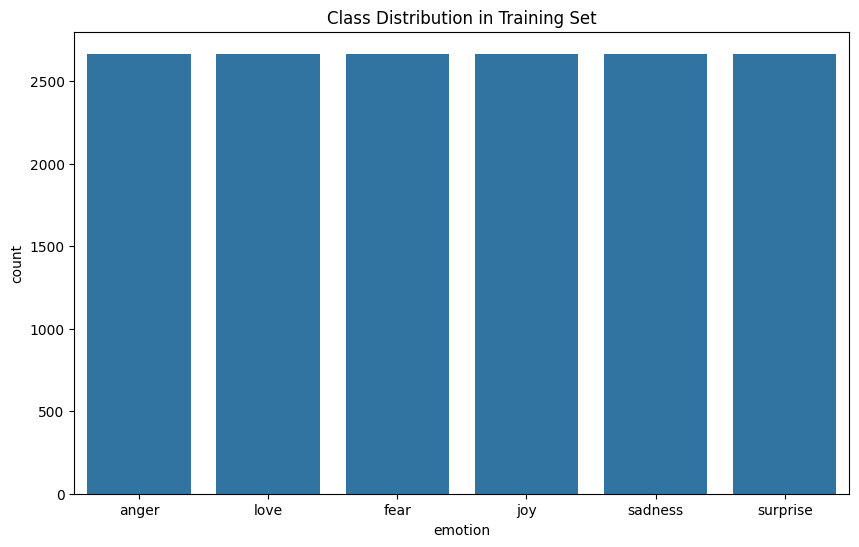

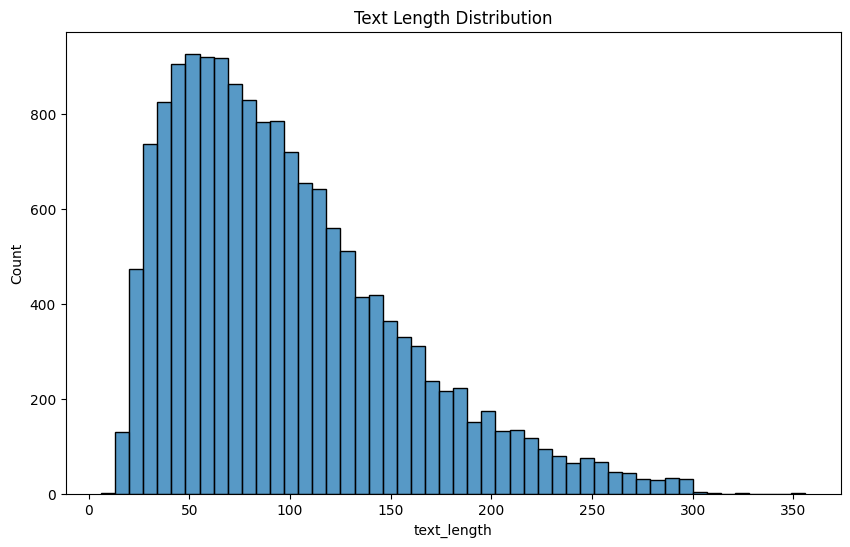

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Class Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='emotion', data=train_df)
plt.title('Class Distribution in Training Set')
plt.show()

# Text Length Analysis
train_df['text_length'] = train_df['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(train_df['text_length'], bins=50)
plt.title('Text Length Distribution')
plt.show()

In [ ]:
# Traditional ML Models
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, train_df['label'])
svm_preds = svm_model.predict(X_test_tfidf)
print("SVM Accuracy:", accuracy_score(test_df['label'], svm_preds))
print(classification_report(test_df['label'], svm_preds, target_names=label_map.values()))

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, train_df['label'])
nb_preds = nb_model.predict(X_test_tfidf)
print("Naive Bayes Accuracy:", accuracy_score(test_df['label'], nb_preds))
print(classification_report(test_df['label'], nb_preds, target_names=label_map.values()))

# Deep Learning Model (BERT)
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments

# Load pre-trained BERT model
model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=6)

# Convert encodings to PyTorch datasets
import torch

class EmotionDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = EmotionDataset(train_encodings, train_df['label'].tolist())
valid_dataset = EmotionDataset(valid_encodings, valid_df['label'].tolist())

# Define Trainer
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
)

# Fine-tune BERT
trainer.train()

SVM Accuracy: 0.901
              precision    recall  f1-score   support

     sadness       0.93      0.88      0.91       333
         joy       0.93      0.85      0.89       334
        love       0.89      0.98      0.93       333
       anger       0.92      0.87      0.90       333
        fear       0.86      0.86      0.86       334
    surprise       0.88      0.97      0.92       333

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000

Naive Bayes Accuracy: 0.847
              precision    recall  f1-score   support

     sadness       0.88      0.86      0.87       333
         joy       0.87      0.75      0.81       334
        love       0.83      0.90      0.87       333
       anger       0.87      0.83      0.85       333
        fear       0.82      0.81      0.82       334
    surprise       0.82      0.92      0.86       333

    accuracy                 

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: csd-leopards (csd-leopards-coventry-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss
